<a href="https://colab.research.google.com/github/Juggernaut2705/Deep-Learning-Model-on-Roads-Quality/blob/main/NHAI_road_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Mon Aug  7 15:40:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python --version


Python 3.10.12


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
# Define the paths to your data
train_dir = '/content/drive/MyDrive/Pothole_detection/Train_data'
validation_dir = '/content/drive/MyDrive/Pothole_detection/Val_data'

print (validation_dir)

/content/drive/MyDrive/Pothole_detection/Val_data


In [ ]:
#wanted to know the dimensions of my images to set a good target size and input shape
import os
import cv2

# Specifed the folder path where images are located
folder_path = "/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad"

# Lists all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png'))]

# Print dimensions for each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    print (image_path)
    image = cv2.imread(image_path)
    if image is not None:
        height, width, channels = image.shape
        print(f"Image: {image_file} - Height: {height}, Width: {width}, Channels: {channels}")
    else:
        print(f"Failed to read {image_file}")






/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-40186-120_2.jpg
Image: PE-AR-40186-120_2.jpg - Height: 239, Width: 512, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-40188-58_1.jpg
Image: PE-AR-40188-58_1.jpg - Height: 640, Width: 480, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-40188-58_2.jpg
Image: PE-AR-40188-58_2.jpg - Height: 640, Width: 480, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-40178-18_2.jpg
Image: PE-AR-40178-18_2.jpg - Height: 512, Width: 384, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-27669-139_2.jpg
Image: PE-AR-27669-139_2.jpg - Height: 384, Width: 512, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-40178-18_1.jpg
Image: PE-AR-40178-18_1.jpg - Height: 512, Width: 384, Channels: 3
/content/drive/MyDrive/Pothole_detection/Val_dat

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
print ("importing done")

importing done


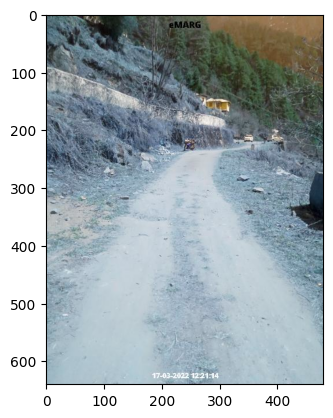

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel2_badroad/PE-AR-27661-72_1.jpg"))

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
# Function to resize the images to a target resolution
def resize_images(input_folder, output_folder, target_size=(224, 224)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_img)

# Function to normalize pixel values to [0, 1] range
def normalize_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            normalized_img = img.astype(float) / 255.0
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, normalized_img)

# mention the file path for above normalized images to be stored:
input_folder = "/content/drive/MyDrive/Pothole_detection/Val_data/emargmodel4_goodroad"
resized_folder = "/content/drive/MyDrive/Pothole_detection/val_resized/resized_val_goodroad"
normalized_folder = "/content/drive/MyDrive/Pothole_detection/val_normalized/normalized_val_goodroad"

# Set the target size for resizing
target_size = (224, 224)

# Resize the images
resize_images(input_folder, resized_folder, target_size)

# Normalize the pixel values
normalize_images(resized_folder, normalized_folder)


In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Pothole_detection/train_normalized'
valid_path = '/content/drive/MyDrive/Pothole_detection/val_normalized'



In [ ]:
# add preprocessing layer to the front of mobilenetv2
mbnt = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in mbnt.layers:
  layer.trainable = False



9406464/9406464 [==============================] - 0s 0us/step


In [ ]:


  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Pothole_detection/train_normalized/*')


# our layers - you can add more if you want
x = Flatten()(mbnt.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Pothole_detection/Train_data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Pothole_detection/Val_data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 13636 images belonging to 2 classes.
Found 1531 images belonging to 3 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


NameError: ignored

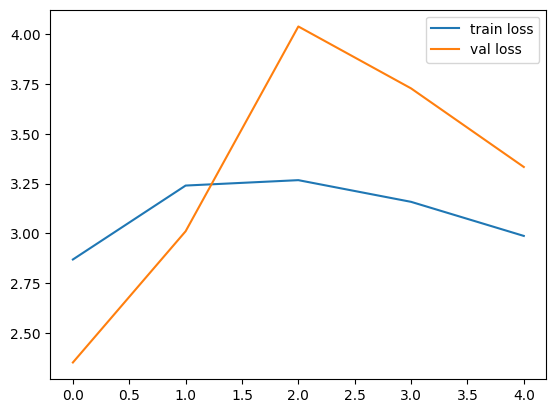

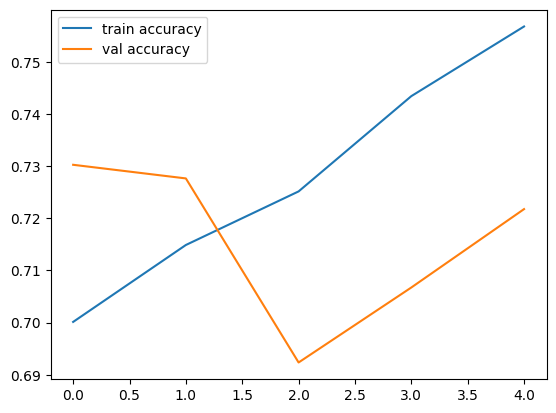

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('roadfeatures_new_model.h5')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Pothole_detection/emarg_model/train-2/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 6833 images belonging to 1 classes.


In [ ]:
image=cv2.imread("/content/drive/MyDrive/Pothole_detection/emarg_model 2/val/1/PE-AR-69740-100_1.jpg")
print (image.shape)

(384, 512, 3)


we were just playing around with the code and now we are ready to build the actual code


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
# Loading ResNet50 pre-trained model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')


NameError: ignored

In [ ]:

# Adding custom classification layers over the pre-trained model
IMAGE_SHAPE=(224,224)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(122, activation='relu')(x)  # Additional dense layer for feature fusion
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (good/bad roads)

model = Model(inputs=base_model.input, outputs=predictions)


NameError: ignored